# Tianyi Zhang 9598110243

-------------

## 1. Time Series Classification

### a)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
import sys
import warnings

warnings.filterwarnings('ignore')
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### b)

In [3]:
data_folder = '..\\data\\AReM'

all_paths = []
train_paths = []
test_paths = []

dirs = os.listdir(data_folder)

for index, dir in enumerate(dirs):
    if os.path.isdir(os.path.join(data_folder,dir)):
        for file in os.listdir(os.path.join(data_folder,dir)):
            all_paths.append(data_folder + '\\' + dir + '\\' + file)

for index, dir in enumerate(dirs):
    if os.path.isdir(os.path.join(data_folder,dir)):
        test_paths.append(data_folder + '\\' + dir + '\\' + 'dataset1.csv')
        test_paths.append(data_folder + '\\' + dir + '\\' + 'dataset2.csv')
        if index > 1:
            test_paths.append(data_folder + '\\' + dir + '\\' + 'dataset3.csv')

train_paths = list(set(all_paths) - set(test_paths))
train_paths.sort(key=all_paths.index)

print(len(all_paths),len(train_paths), len(test_paths))

88 69 19


In [4]:
datalist = []

for filename in train_paths:
    df = pd.read_csv(filename,skiprows=range(4))
    datalist.append(df)

data_train = pd.concat(datalist, axis=0, ignore_index=True)

datalist = []

for filename in test_paths:
#     print(filename)
    df = pd.read_csv(filename,skiprows=range(4))
    datalist.append(df)

data_test = pd.concat(datalist, axis=0, ignore_index=True)

print('training data shape: '+str(data_train.shape))
print('test data shape: '+str(data_test.shape))
print(data_train.head(5).to_string())
print(data_test.head(5).to_string())



training data shape: (33120, 7)
test data shape: (9120, 7)
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0                0      42.00       0.71      21.25       0.43      30.00       0.00
1              250      41.50       0.50      20.25       1.48      31.25       1.09
2              500      41.50       0.50      14.25       1.92      33.00       0.00
3              750      40.75       0.83      15.75       0.43      33.00       0.00
4             1000      40.00       0.71      20.00       2.74      32.75       0.43
   # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0                0      39.25       0.43      22.75       0.43      33.75        1.3
1              250      39.25       0.43      23.00       0.00      33.00        0.0
2              500      39.25       0.43      23.25       0.43      33.00        0.0
3              750      39.50       0.50      23.00       0.71      33.00        0.0
4     

### c)

#### 1)

**For example: minimum, maximum, mean, median, standard deviation, first quartile, third quartile, skewness, kurtosis**

#### 2)

In [5]:
features = pd.DataFrame()

for fileindex, path in enumerate(all_paths):
    label = path.split("\\")[3]
#     print(path)
    df = pd.read_csv(path,skiprows=range(4))
    
    feature = pd.DataFrame()
    for index, column in enumerate(df.columns[1:]):
        data = {"min(" + str(index + 1) + ")": df[column].min(),
                "max(" + str(index + 1) + ")": df[column].max(),
                "mean(" + str(index + 1) + ")": df[column].mean(),
                "median(" + str(index + 1) + ")": df[column].median(),
                "standard deviation(" + str(index + 1) + ")": df[column].std(),
                "1st quart(" + str(index + 1) + ")": df[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": df[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        feature = pd.concat([feature, temp], axis=1)

    features = features.append(feature)

print(features.head(5))


   min(1)  max(1)    mean(1)  median(1)  standard deviation(1)  1st quart(1)  \
1   37.25   45.00  40.624792      40.50               1.476967         39.25   
2   38.00   45.67  42.812812      42.50               1.435550         42.00   
3   35.00   47.40  43.954500      44.33               1.558835         43.00   
4   33.00   47.75  42.179812      43.50               3.670666         39.15   
5   33.00   45.75  41.678063      41.75               2.243490         41.33   

   3rd quart(1)  min(2)  max(2)   mean(2)  ...  standard deviation(5)  \
1         42.00     0.0    1.30  0.358604  ...               2.188449   
2         43.67     0.0    1.22  0.372437  ...               1.995255   
3         45.00     0.0    1.70  0.426250  ...               1.999604   
4         45.00     0.0    3.00  0.696042  ...               3.849448   
5         42.75     0.0    2.83  0.535979  ...               2.411026   

   1st quart(5)  3rd quart(5)  min(6)  max(6)   mean(6)  median(6)  \
1       33

#### 3)

In [6]:
confidence_interval = {}

for column in features.columns:
    print(column+'std:'+str(features[column].std()))
    range_CI = []
    for i in range(0, 999):
        bs_random = features[column].sample(n=10, replace=True)
        stat = bs_random.std()
        range_CI.append(stat)
    range_CI.sort()
    lowerValue = np.percentile(range_CI, 5)
    upperValue = np.percentile(range_CI, 95)
    confidence_interval[column] = [lowerValue, upperValue]

print(confidence_interval)

min(1)std:9.569975284512807
max(1)std:4.39436168470319
mean(1)std:5.335703257246117
median(1)std:5.440054137152637
standard deviation(1)std:1.772155325516896
1st quart(1)std:6.1535897241853705
3rd quart(1)std:5.138924613450999
min(2)std:0.0
max(2)std:5.0627293748106394
mean(2)std:1.5741696585401823
median(2)std:1.4122441649745636
standard deviation(2)std:0.8841037863795369
1st quart(2)std:0.9463861911256928
3rd quart(2)std:2.1252664064059106
min(3)std:2.956462059205819
max(3)std:4.875136693954745
mean(3)std:4.008379962348066
median(3)std:4.036396318784075
standard deviation(3)std:0.9466945407645754
1st quart(3)std:4.22065788450763
3rd quart(3)std:4.171628224016796
min(4)std:0.0
max(4)std:2.1836254849723407
mean(4)std:1.1661141146480976
median(4)std:1.1455856609880564
standard deviation(4)std:0.45824777315143417
1st quart(4)std:0.8436196840035469
3rd quart(4)std:1.5525041782503675
min(5)std:6.124001430553483
max(5)std:5.741238300951952
mean(5)std:5.6755932045403785
median(5)std:5.813782

#### 4)

**I can choose min, mean, and max.**

**Because in my result, we can find the standard error for these features are small. So, they are relatively stable.**

### d)

#### 1)

In [7]:
train_features = pd.DataFrame()


for fileindex, path in enumerate(train_paths):
    label = path.split("\\")[3]
    df = pd.read_csv(path,skiprows=range(4))
    
    train_feature = pd.DataFrame()
    for index, column in enumerate(df.columns[1:]):
        data = {"min(" + str(index + 1) + ")": df[column].min(),
                "max(" + str(index + 1) + ")": df[column].max(),
                "mean(" + str(index + 1) + ")": df[column].mean(),
                "median(" + str(index + 1) + ")": df[column].median(),
                "standard deviation(" + str(index + 1) + ")": df[column].std(),
                "1st quart(" + str(index + 1) + ")": df[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": df[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        train_feature = pd.concat([train_feature, temp], axis=1)
        
    train_feature["label"] = 1 if label == "bending1" or label == 'bending2' else 0
    train_features = train_features.append(train_feature)
    
if np.any(df.isnull())==True:
    print('no')


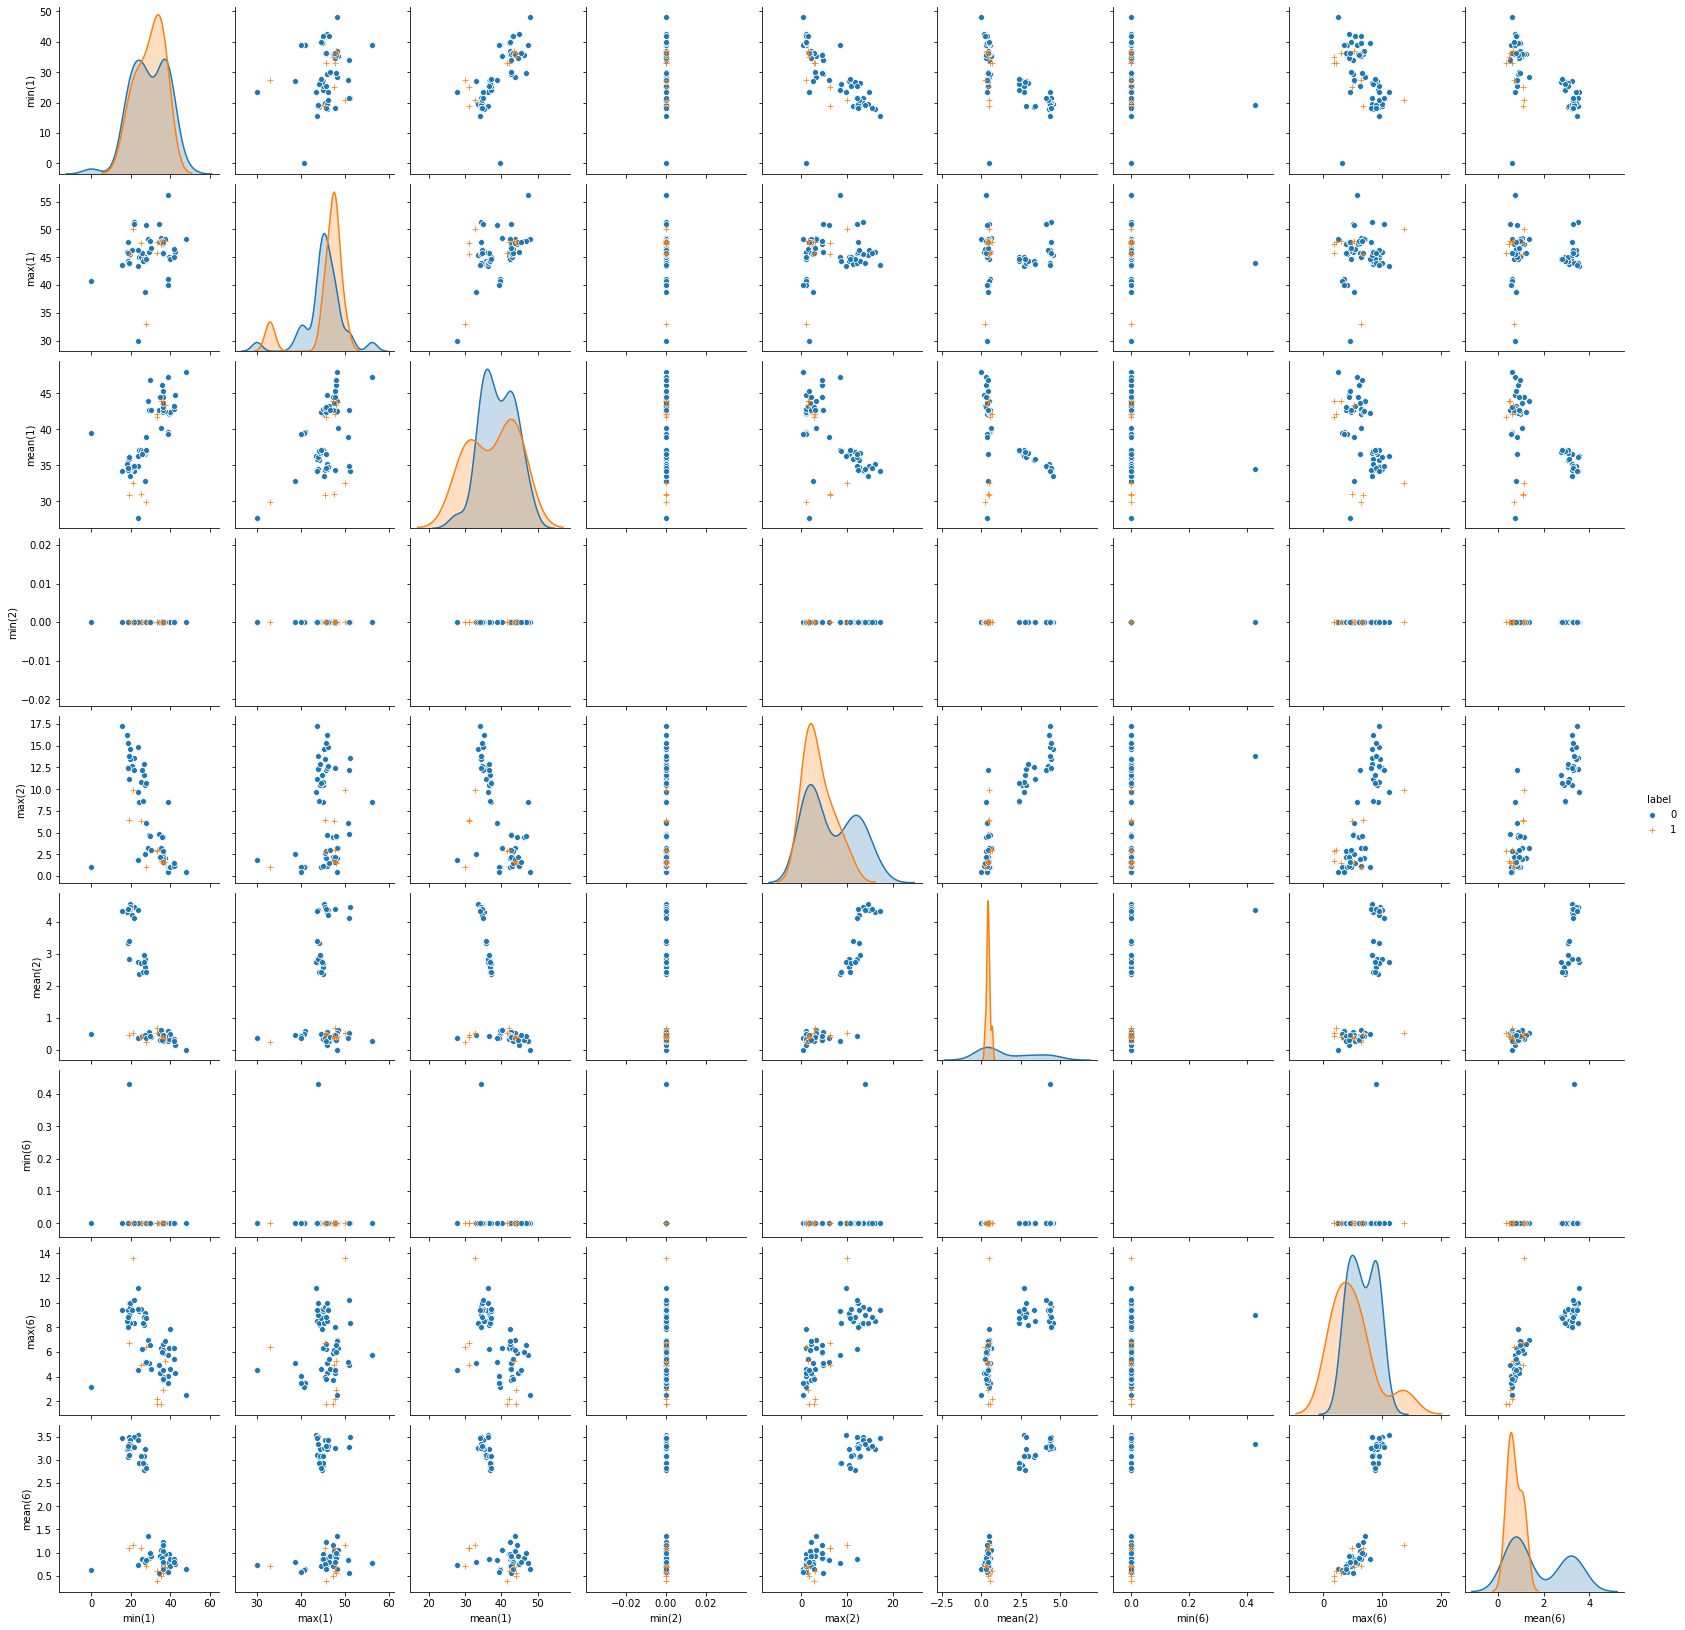

In [8]:
feature_columns = ['min(1)', 'max(1)', 'mean(1)', 'min(2)', 'max(2)', 'mean(2)', 'min(6)', 
            'max(6)', 'mean(6)', 'label']
specified_features = train_features[feature_columns]
# print(specified_features.to_string())
sns.pairplot(specified_features, hue="label", markers=["o", "+"])
plt.show()

#### 2)

In [9]:
train_features = pd.DataFrame()

for fileindex, path in enumerate(train_paths):
    label = path.split("\\")[3]
    df = pd.read_csv(path,skiprows=range(4))
    df1 = df.iloc[:240]
    df2 = df.iloc[240:,1:]
    df2.columns = range(6)
    dataset = pd.concat([df1, df2], axis=1)
#     print(dataset.columns[1:])
    train_feature = pd.DataFrame()
    for index, column in enumerate(dataset.columns[1:]):
        data = {"min(" + str(index + 1) + ")": dataset[column].min(),
                "max(" + str(index + 1) + ")": dataset[column].max(),
                "mean(" + str(index + 1) + ")": dataset[column].mean(),
                "median(" + str(index + 1) + ")": dataset[column].median(),
                "standard deviation(" + str(index + 1) + ")": dataset[column].std(),
                "1st quart(" + str(index + 1) + ")": dataset[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": dataset[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        train_feature = pd.concat([train_feature, temp], axis=1)
        
    train_feature["label"] = 1 if label == "bending1" or label == 'bending2' else 0
    train_features = train_features.append(train_feature)
    
print(train_features.head(5))


   min(1)  max(1)    mean(1)  median(1)  standard deviation(1)  1st quart(1)  \
1   36.50   46.50  44.057167      44.50               1.556971       43.2500   
2   33.75   47.75  43.278875      45.00               3.473355       42.0000   
3   33.00   45.75  41.621208      42.33               3.118644       39.6525   
4   39.00   48.00  44.117042      45.00               1.359836       43.5000   
5   36.67   45.00  43.486208      43.71               1.281976       42.3300   

   3rd quart(1)  min(2)  max(2)   mean(2)  ...  1st quart(11)  3rd quart(11)  \
1         45.00     0.0    1.50  0.381042  ...          33.00        36.2500   
2         45.25     0.0    3.00  0.673292  ...          28.75        33.7500   
3         44.25     0.0    2.83  0.623083  ...          28.31        30.5625   
4         45.00     0.0    1.30  0.250042  ...          22.50        23.7500   
5         44.50     0.0    1.30  0.378667  ...          21.00        23.5000   

   min(12)  max(12)  mean(12)  median(

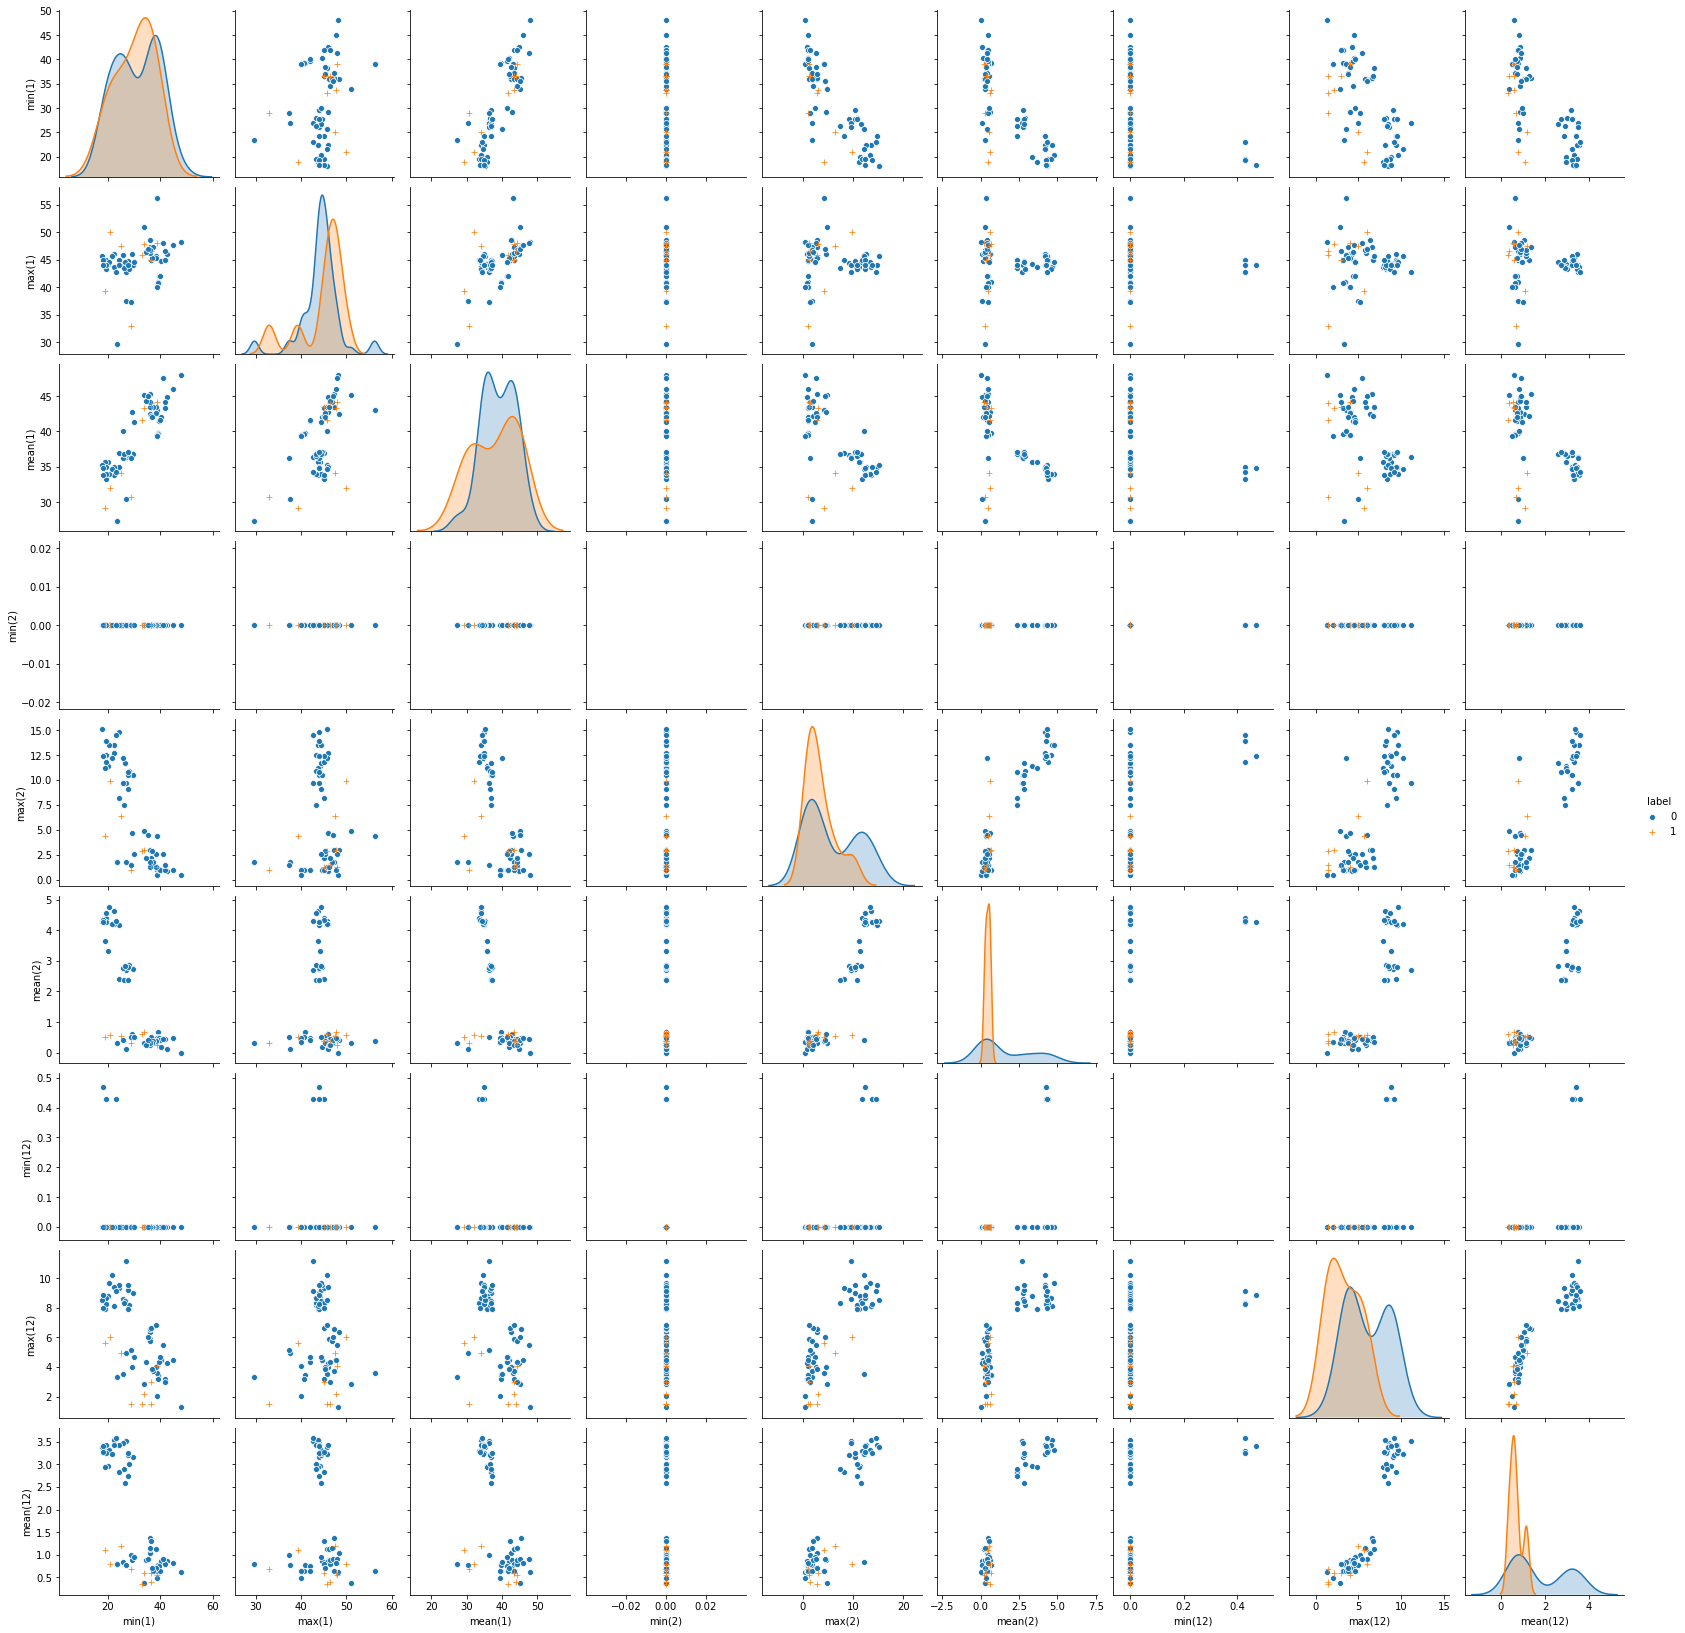

In [10]:
features = ['min(1)', 'max(1)', 'mean(1)', 'min(2)', 'max(2)', 'mean(2)', 'min(12)', 
            'max(12)', 'mean(12)', 'label']
specified_features = train_features[features]
sns.pairplot(specified_features, hue="label", markers=["o", "+"])
plt.show()

**no much difference**

#### 3)

In [5]:
import statsmodels.api as sm

In [6]:
def get_labels(parts):
    labels = []
    for index in range(parts*6):
        labels.extend(["min(" + str(index + 1) + ")",
                       "max(" + str(index + 1) + ")",
                       "mean(" + str(index + 1) + ")",
                       "median(" + str(index + 1) + ")",
                       "standard deviation(" + str(index + 1) + ")",
                       "1st quart(" + str(index + 1) + ")",
                       "3rd quart(" + str(index + 1) + ")"])

    return labels

In [7]:
def get_columns(parts):
    column_label = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
    columns = []
    for index in range(parts):
        columns.extend([str(column + "_" + str(index + 1)) for column in column_label])

    return columns

In [8]:
def data_split(df, parts):
    result = pd.DataFrame()
    division = len(df) / float(parts)
    datalist = [df.to_numpy()[int(round(division * i)): int(round(division * (i + 1)))] 
        for i in range(parts)]

    for index in range(len(datalist)):
        result = pd.concat([result, pd.DataFrame(datalist[index])], axis=1, sort=False)
    return result

In [12]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


In [15]:

rfe = {}
var = dict()

for parts in range(1, 21):
    train_features = pd.DataFrame()

    for fileindex, path in enumerate(train_paths):
        label = path.split("\\")[3]
        df = pd.read_csv(path,skiprows=range(4))
        datapoint = df.iloc[:,1:]
        result = data_split(datapoint, parts)
        result.columns = get_columns(parts=parts)
#         print(result.head(5))
        train = pd.DataFrame()
        for index, column in enumerate(result.columns[0:]):
            data = {"min(" + str(index + 1) + ")": result[column].min(),
                    "max(" + str(index + 1) + ")": result[column].max(),
                    "mean(" + str(index + 1) + ")": result[column].mean(),
                    "median(" + str(index + 1) + ")": result[column].median(),
                    "standard deviation(" + str(index + 1) + ")": result[column].std(),
                    "1st quart(" + str(index + 1) + ")": result[column].quantile(.25),
                    "3rd quart(" + str(index + 1) + ")": result[column].quantile(.75)
                    }
            temp = pd.DataFrame(data, index=[fileindex+1])
            train = pd.concat([train, temp], axis=1)
        train["label"] = 1 if label == "bending1" or label == 'bending2' else 0
        train_features = train_features.append(train, sort=False)
        

    logitModel = LogisticRegression()
    cv = RFECV(estimator=logitModel, 
               cv=StratifiedKFold(5), 
               scoring='accuracy')

    train_column_labels = list(train_features.columns.values)
    cv.fit(train_features[train_column_labels[:-1]],
           train_features['label'])

    labels = get_labels(parts)
    rfe[parts] = cv.grid_scores_[
        cv.n_features_ - 1]
    tempList = list()
    for index, value in enumerate(labels):
        if cv.support_[index] == True:
            tempList.append(value)

    var[parts] = tempList

bestL = [key for maxValue in [max(rfe.values())] 
         for key, val in rfe.items() if val == maxValue][0]
features = var[bestL]

print("Best (l, p) : ", bestL, len(features))
print("we will choose : ", features)

Best (l, p) :  1 11
we will choose :  ['mean(1)', '3rd quart(1)', 'max(2)', 'min(3)', 'median(3)', '1st quart(3)', 'min(5)', 'max(5)', 'mean(5)', '1st quart(5)', '3rd quart(5)']


#### 4)

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [25]:

train_features = pd.DataFrame()

for fileindex, path in enumerate(train_paths):
    label = path.split("\\")[3]
    df = pd.read_csv(path,skiprows=range(4))
    datapoint = df.iloc[:,1:]
    result = data_split(datapoint, bestL)
    result.columns = get_columns(parts=bestL)

    train = pd.DataFrame()
    for index, column in enumerate(result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": result[column].min(),
                "max(" + str(index + 1) + ")": result[column].max(),
                "mean(" + str(index + 1) + ")": result[column].mean(),
                "median(" + str(index + 1) + ")": result[column].median(),
                "standard deviation(" + str(index + 1) + ")": result[column].std(),
                "1st quart(" + str(index + 1) + ")": result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        train = pd.concat([train, temp], axis=1)
    train["label"] = 1 if label == "bending1" or label == 'bending2' else 0
    train_features = train_features.append(train, sort=False)


In [26]:
xtr = train_features[features]
ytr = train_features['label']

test_logitModel = LogisticRegression()
test_logitModel.fit(xtr, ytr)
pred = test_logitModel.predict(xtr)
fp, tp, thresholds = roc_curve(ytr, pred)
area = auc(fp, tp)

In [27]:
confusion_matrix = pd.crosstab(ytr, pred, 
                               rownames=['True'], colnames=['Predicted'], margins=True)
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
Predicted   0  1  All
True                 
0          60  0   60
1           0  9    9
All        60  9   69


ROC:


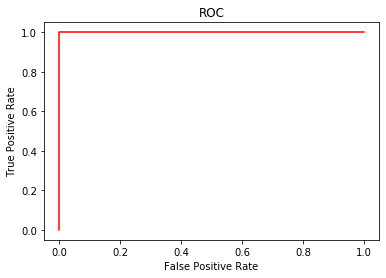

-----------------------
AUC: 1.0


In [31]:
print("ROC:")
plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print("-----------------------")
print("AUC:", area)

In [29]:
sm_logitModel = sm.Logit(ytr, xtr).fit_regularized()
print("Parameters:")
print("-----------------------")
print(sm_logitModel.params)
print("P-values:")
print("-----------------------")
print(sm_logitModel.pvalues)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.90270717312588e-11
            Iterations: 37
            Function evaluations: 44
            Gradient evaluations: 37
Parameters:
-----------------------
mean(1)        -1.452846
3rd quart(1)   -3.147207
max(2)         -4.193428
min(3)         -4.331642
median(3)      -3.039180
1st quart(3)    2.408898
min(5)          4.288439
max(5)          6.134733
mean(5)         1.827201
1st quart(5)    3.332112
3rd quart(5)   -3.456586
label           3.086989
dtype: float64
P-values:
-----------------------
mean(1)         NaN
3rd quart(1)    1.0
max(2)          NaN
min(3)          NaN
median(3)       1.0
1st quart(3)    1.0
min(5)          NaN
max(5)          NaN
mean(5)         1.0
1st quart(5)    NaN
3rd quart(5)    NaN
label           NaN
dtype: float64


#### 5)

In [4]:
bestL = 1
features = ['mean(1)', '3rd quart(1)', 'max(2)', 'min(3)', 'median(3)', '1st quart(3)', 'min(5)', 'max(5)', 'mean(5)', '1st quart(5)', '3rd quart(5)']

In [23]:
test_features = pd.DataFrame()

for fileindex, path in enumerate(test_paths):
    label = path.split("\\")[3]
    df = pd.read_csv(path,skiprows=range(4))
    datapoint = df.iloc[:,1:]
    result = data_split(datapoint, bestL)
    result.columns = get_columns(parts=bestL)

    test = pd.DataFrame()
    for index, column in enumerate(result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": result[column].min(),
                "max(" + str(index + 1) + ")": result[column].max(),
                "mean(" + str(index + 1) + ")": result[column].mean(),
                "median(" + str(index + 1) + ")": result[column].median(),
                "standard deviation(" + str(index + 1) + ")": result[column].std(),
                "1st quart(" + str(index + 1) + ")": result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        test = pd.concat([test, temp], axis=1)
    test["label"] = 1 if label == "bending1" or label == 'bending2' else 0
    test_features = test_features.append(test, sort=False)

xte = test_features[features]
yte = test_features['label']

print("The accuracy on the train set is ",test_logitModel.score(xtr, ytr))
print("The accuracy on the test set is ",test_logitModel.score(xte, yte))

The accuracy on the train set is  1.0
The accuracy on the test set is  0.9473684210526315


**we can find the test error rate will be larger than the train error rate.**

#### 6)

**Yes.**

**When I train my model, it's unstable.**

#### 7)

In [9]:
from sklearn.utils import resample

features.append('label')

stat_features = pd.DataFrame()
for fileindex, path in enumerate(all_paths):
    label = path.split("\\")[3]
    df = pd.read_csv(path,skiprows=range(4))
    datapoint = df.iloc[:,1:]
    result = data_split(datapoint, bestL)
    result.columns = get_columns(parts=bestL)

    feature = pd.DataFrame()
    for index, column in enumerate(result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": result[column].min(),
                "max(" + str(index + 1) + ")": result[column].max(),
                "mean(" + str(index + 1) + ")": result[column].mean(),
                "median(" + str(index + 1) + ")": result[column].median(),
                "standard deviation(" + str(index + 1) + ")": result[column].std(),
                "1st quart(" + str(index + 1) + ")": result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        feature = pd.concat([feature, temp], axis=1)
    feature["label"] = 1 if label == "bending1" or label == 'bending2' else 0
    stat_features = stat_features.append(feature, sort=False)


In [20]:
bending = stat_features[features][stat_features.label == 1]
non_bending = stat_features[features][stat_features.label == 0]


bs_bending = resample(bending, replace=True, n_samples=60)
re_dataset = pd.concat([non_bending, bs_bending])

x = re_dataset[list(re_dataset.columns.values)[:-1]]
y = re_dataset['label']
# print(x.shape)

In [21]:
re_logitModel = LogisticRegression()
re_logitModel.fit(x, y)
re_prediction = re_logitModel.predict(x)
confusion_matrix = pd.crosstab(y, re_prediction, rownames=['True'], colnames=['Predicted'], margins=True)
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
Predicted   0   1  All
True                  
0          75   0   75
1           0  60   60
All        75  60  135


ROC:


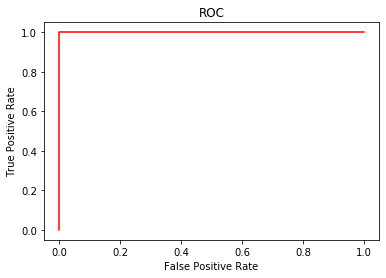

-----------------------
AUC: 1.0


In [23]:
fp, tp, thresholds = roc_curve(y, re_prediction)
area = auc(fp, tp)

print("ROC:")
plt.plot(fp, tp, color='red')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print("-----------------------")
print("AUC:", area)

### e)

#### 1)

In [25]:
from sklearn.linear_model import LogisticRegressionCV

In [27]:
l1 = list()

for parts in range(1, 21):
    train_features = pd.DataFrame()

    for fileindex, path in enumerate(train_paths):
        label = path.split("\\")[3]
        df = pd.read_csv(path,skiprows=range(4))
        datapoint = df.iloc[:,1:]
        result = data_split(datapoint, parts)
        result.columns = get_columns(parts=parts)
#         print(result.head(5))
        train = pd.DataFrame()
        for index, column in enumerate(result.columns[0:]):
            data = {"min(" + str(index + 1) + ")": result[column].min(),
                    "max(" + str(index + 1) + ")": result[column].max(),
                    "mean(" + str(index + 1) + ")": result[column].mean(),
                    "median(" + str(index + 1) + ")": result[column].median(),
                    "standard deviation(" + str(index + 1) + ")": result[column].std(),
                    "1st quart(" + str(index + 1) + ")": result[column].quantile(.25),
                    "3rd quart(" + str(index + 1) + ")": result[column].quantile(.75)
                    }
            temp = pd.DataFrame(data, index=[fileindex+1])
            train = pd.concat([train, temp], axis=1)
        train["label"] = 1 if label == "bending1" or label == 'bending2' else 0
        train_features = train_features.append(train, sort=False)
    
    x = train_features[list(train_features.columns.values)[:-1]]
    y = train_features['label']
    logitModel = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(x, y)
    l1.append(logitModel.score(x, y))


Test Error Rate :  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Best l :  1


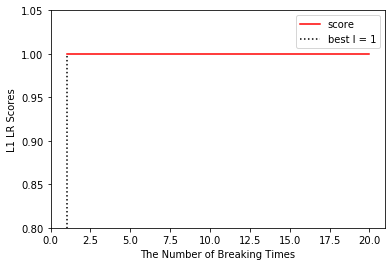

In [29]:
print("Test Error Rate : ", l1)
bestL = l1.index(max(l1)) + 1
print("Best l : ", bestL)

plt.plot(range(1, 21), l1, color='red', label='score')
plt.vlines(bestL, 0, 1, linestyles='dotted', label="best l = " + str(bestL))
plt.xlabel('The Number of Breaking Times')
plt.ylabel('L1 LR Scores')
plt.xlim(0, 21)
plt.ylim(0.8, 1.05)
plt.legend()
plt.show()

#### 2)

**l1 norm(the lasso) performs better, and also easier to implement.**

### f)

#### 1)

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [44]:
import enum

class LABEL(enum.Enum):
    bending1 = 0
    bending2 = 0
    cycling = 1
    lying = 2
    sitting = 3
    standing = 4
    walking = 5

In [40]:
error = list()

for parts in range(1, 21):
    train_features = pd.DataFrame()
    test_features = pd.DataFrame()
    for fileindex, path in enumerate(train_paths):
        train_label = path.split("\\")[3]
        train_df = pd.read_csv(path,skiprows=range(4))
        train_datapoint = train_df.iloc[:,1:]
        train_result = data_split(train_datapoint, parts)
        train_result.columns = get_columns(parts=parts)

        train = pd.DataFrame()
        for index, column in enumerate(train_result.columns[0:]):
            data = {"min(" + str(index + 1) + ")": train_result[column].min(),
                    "max(" + str(index + 1) + ")": train_result[column].max(),
                    "mean(" + str(index + 1) + ")": train_result[column].mean(),
                    "median(" + str(index + 1) + ")": train_result[column].median(),
                    "standard deviation(" + str(index + 1) + ")": train_result[column].std(),
                    "1st quart(" + str(index + 1) + ")": train_result[column].quantile(.25),
                    "3rd quart(" + str(index + 1) + ")": train_result[column].quantile(.75)
                    }
            temp = pd.DataFrame(data, index=[fileindex+1])
            train = pd.concat([train, temp], axis=1)
        train["label"] = LABEL[train_label].value
        train_features = train_features.append(train, sort=False)
#     print(train_features.shape)
    for fileindex, path in enumerate(test_paths):
        test_label = path.split("\\")[3]
        test_df = pd.read_csv(path,skiprows=range(4))
        test_datapoint = test_df.iloc[:,1:]
        test_result = data_split(test_datapoint, parts)
        test_result.columns = get_columns(parts=parts)

        test = pd.DataFrame()
        for index, column in enumerate(test_result.columns[0:]):
            data = {"min(" + str(index + 1) + ")": test_result[column].min(),
                    "max(" + str(index + 1) + ")": test_result[column].max(),
                    "mean(" + str(index + 1) + ")": test_result[column].mean(),
                    "median(" + str(index + 1) + ")": test_result[column].median(),
                    "standard deviation(" + str(index + 1) + ")": test_result[column].std(),
                    "1st quart(" + str(index + 1) + ")": test_result[column].quantile(.25),
                    "3rd quart(" + str(index + 1) + ")": test_result[column].quantile(.75)
                    }
            temp = pd.DataFrame(data, index=[fileindex+1])
            test = pd.concat([test, temp], axis=1)
        test["label"] = LABEL[test_label].value
        test_features = test_features.append(test, sort=False)
#     print(test_features.shape)

    xtr = train_features[list(train_features.columns.values)[:-1]]
    ytr = train_features['label']

    xte = test_features[list(test_features.columns.values)[:-1]]
    yte = test_features['label']

    logitModel = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(xtr, ytr)
    error.append(1 - logitModel.score(xte, yte))


In [41]:
print("Test Error Rate : ", error)
bestL = error.index(max(error)) + 1
print("Best l : ", bestL)

Test Error Rate :  [0.052631578947368474, 0.21052631578947367, 0.26315789473684215, 0.21052631578947367, 0.1578947368421053, 0.10526315789473684, 0.21052631578947367, 0.10526315789473684, 0.21052631578947367, 0.1578947368421053, 0.21052631578947367, 0.1578947368421053, 0.1578947368421053, 0.21052631578947367, 0.21052631578947367, 0.10526315789473684, 0.21052631578947367, 0.21052631578947367, 0.21052631578947367, 0.26315789473684215]
Best l :  3


In [42]:
train_features = pd.DataFrame()
test_features = pd.DataFrame()

In [45]:
for fileindex, path in enumerate(train_paths):
    train_label = path.split("\\")[3]
    train_df = pd.read_csv(path,skiprows=range(4))
    train_datapoint = train_df.iloc[:,1:]
    train_result = data_split(train_datapoint, bestL)
    train_result.columns = get_columns(parts=bestL)

    train = pd.DataFrame()
    for index, column in enumerate(train_result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": train_result[column].min(),
                "max(" + str(index + 1) + ")": train_result[column].max(),
                "mean(" + str(index + 1) + ")": train_result[column].mean(),
                "median(" + str(index + 1) + ")": train_result[column].median(),
                "standard deviation(" + str(index + 1) + ")": train_result[column].std(),
                "1st quart(" + str(index + 1) + ")": train_result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": train_result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        train = pd.concat([train, temp], axis=1)
    train["label"] = LABEL[train_label].value
    train_features = train_features.append(train, sort=False)

for fileindex, path in enumerate(test_paths):
    test_label = path.split("\\")[3]
    test_df = pd.read_csv(path,skiprows=range(4))
    test_datapoint = test_df.iloc[:,1:]
    test_result = data_split(test_datapoint, bestL)
    test_result.columns = get_columns(parts=bestL)

    test = pd.DataFrame()
    for index, column in enumerate(test_result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": test_result[column].min(),
                "max(" + str(index + 1) + ")": test_result[column].max(),
                "mean(" + str(index + 1) + ")": test_result[column].mean(),
                "median(" + str(index + 1) + ")": test_result[column].median(),
                "standard deviation(" + str(index + 1) + ")": test_result[column].std(),
                "1st quart(" + str(index + 1) + ")": test_result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": test_result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        test = pd.concat([test, temp], axis=1)
    test["label"] = LABEL[test_label].value
    test_features = test_features.append(test, sort=False)

xtr = train_features[list(train_features.columns.values)[:-1]]
ytr = train_features['label']

xte = test_features[list(test_features.columns.values)[:-1]]
yte = test_features['label']

In [47]:
bi_ytr = label_binarize(ytr, classes=[0, 1, 2, 3, 4, 5])
bi_yte = label_binarize(yte, classes=[0, 1, 2, 3, 4, 5])

classifier = OneVsRestClassifier(
    LogisticRegressionCV(cv=StratifiedKFold(5), penalty="l1", solver="liblinear")).fit(xtr, bi_ytr)

In [48]:
score = classifier.fit(xtr, bi_ytr).decision_function(xte)
pred = classifier.predict(xte)
confusion_matrix = pd.crosstab(bi_yte.argmax(axis=1), pred.argmax(axis=1), rownames=['True'],
                       colnames=['Predicted'], margins=True)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
Predicted   0  1  2  5  All
True                       
0           4  0  0  0    4
1           0  3  0  0    3
2           0  0  3  0    3
3           3  0  0  0    3
4           3  0  0  0    3
5           0  0  0  3    3
All        10  3  3  3   19


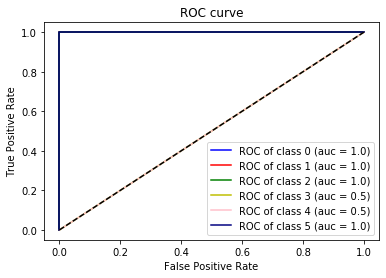

In [65]:
#get ROC for each class
fps = dict()
tps = dict()
areas = dict()

for i in range(bi_ytr.shape[1]):
    fps[i], tps[i], _ = roc_curve(bi_yte[:, i], score[:, i])
    areas[i] = auc(fps[i], tps[i])

colors = ['b', 'r', 'g', 'y', 'pink', 'navy']
for index in range(bi_ytr.shape[1]):
    plt.plot(fps[index], tps[index], color=colors[index],
             label='ROC of class {} (auc = {})'.format(index, str(areas[index])))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

#### 2)

In [50]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

warnings.filterwarnings("ignore", category=DeprecationWarning)


In [52]:
gaussian_error = list()

for parts in range(1, 21):
    train_features = pd.DataFrame()
    test_features = pd.DataFrame()
    for fileindex, path in enumerate(train_paths):
        train_label = path.split("\\")[3]
        train_df = pd.read_csv(path,skiprows=range(4))
        train_datapoint = train_df.iloc[:,1:]
        train_result = data_split(train_datapoint, parts)
        train_result.columns = get_columns(parts=parts)

        train = pd.DataFrame()
        for index, column in enumerate(train_result.columns[0:]):
            data = {"min(" + str(index + 1) + ")": train_result[column].min(),
                    "max(" + str(index + 1) + ")": train_result[column].max(),
                    "mean(" + str(index + 1) + ")": train_result[column].mean(),
                    "median(" + str(index + 1) + ")": train_result[column].median(),
                    "standard deviation(" + str(index + 1) + ")": train_result[column].std(),
                    "1st quart(" + str(index + 1) + ")": train_result[column].quantile(.25),
                    "3rd quart(" + str(index + 1) + ")": train_result[column].quantile(.75)
                    }
            temp = pd.DataFrame(data, index=[fileindex+1])
            train = pd.concat([train, temp], axis=1)
        train["label"] = LABEL[train_label].value
        train_features = train_features.append(train, sort=False)
#     print(train_features.shape)
    for fileindex, path in enumerate(test_paths):
        test_label = path.split("\\")[3]
        test_df = pd.read_csv(path,skiprows=range(4))
        test_datapoint = test_df.iloc[:,1:]
        test_result = data_split(test_datapoint, parts)
        test_result.columns = get_columns(parts=parts)

        test = pd.DataFrame()
        for index, column in enumerate(test_result.columns[0:]):
            data = {"min(" + str(index + 1) + ")": test_result[column].min(),
                    "max(" + str(index + 1) + ")": test_result[column].max(),
                    "mean(" + str(index + 1) + ")": test_result[column].mean(),
                    "median(" + str(index + 1) + ")": test_result[column].median(),
                    "standard deviation(" + str(index + 1) + ")": test_result[column].std(),
                    "1st quart(" + str(index + 1) + ")": test_result[column].quantile(.25),
                    "3rd quart(" + str(index + 1) + ")": test_result[column].quantile(.75)
                    }
            temp = pd.DataFrame(data, index=[fileindex+1])
            test = pd.concat([test, temp], axis=1)
        test["label"] = LABEL[test_label].value
        test_features = test_features.append(test, sort=False)
#     print(test_features.shape)

    xtr = train_features[list(train_features.columns.values)[:-1]]
    ytr = train_features['label']

    xte = test_features[list(test_features.columns.values)[:-1]]
    yte = test_features['label']

    gaussian_Classifier = GaussianNB()
    gaussian_error.append(1 - np.mean(
        cross_val_score(gaussian_Classifier, xtr, ytr, cv=5)))


In [55]:
print("Test Error Rate : ", error)
bestL = gaussian_error.index(max(gaussian_error)) + 1
print("Best l : ", bestL)

Test Error Rate :  [0.052631578947368474, 0.21052631578947367, 0.26315789473684215, 0.21052631578947367, 0.1578947368421053, 0.10526315789473684, 0.21052631578947367, 0.10526315789473684, 0.21052631578947367, 0.1578947368421053, 0.21052631578947367, 0.1578947368421053, 0.1578947368421053, 0.21052631578947367, 0.21052631578947367, 0.10526315789473684, 0.21052631578947367, 0.21052631578947367, 0.21052631578947367, 0.26315789473684215]
Best l :  18


In [56]:
train_features = pd.DataFrame()
test_features = pd.DataFrame()

In [57]:
for fileindex, path in enumerate(train_paths):
    train_label = path.split("\\")[3]
    train_df = pd.read_csv(path,skiprows=range(4))
    train_datapoint = train_df.iloc[:,1:]
    train_result = data_split(train_datapoint, bestL)
    train_result.columns = get_columns(parts=bestL)

    train = pd.DataFrame()
    for index, column in enumerate(train_result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": train_result[column].min(),
                "max(" + str(index + 1) + ")": train_result[column].max(),
                "mean(" + str(index + 1) + ")": train_result[column].mean(),
                "median(" + str(index + 1) + ")": train_result[column].median(),
                "standard deviation(" + str(index + 1) + ")": train_result[column].std(),
                "1st quart(" + str(index + 1) + ")": train_result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": train_result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        train = pd.concat([train, temp], axis=1)
    train["label"] = LABEL[train_label].value
    train_features = train_features.append(train, sort=False)

for fileindex, path in enumerate(test_paths):
    test_label = path.split("\\")[3]
    test_df = pd.read_csv(path,skiprows=range(4))
    test_datapoint = test_df.iloc[:,1:]
    test_result = data_split(test_datapoint, bestL)
    test_result.columns = get_columns(parts=bestL)

    test = pd.DataFrame()
    for index, column in enumerate(test_result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": test_result[column].min(),
                "max(" + str(index + 1) + ")": test_result[column].max(),
                "mean(" + str(index + 1) + ")": test_result[column].mean(),
                "median(" + str(index + 1) + ")": test_result[column].median(),
                "standard deviation(" + str(index + 1) + ")": test_result[column].std(),
                "1st quart(" + str(index + 1) + ")": test_result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": test_result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        test = pd.concat([test, temp], axis=1)
    test["label"] = LABEL[test_label].value
    test_features = test_features.append(test, sort=False)

xtr = train_features[list(train_features.columns.values)[:-1]]
ytr = train_features['label']

xte = test_features[list(test_features.columns.values)[:-1]]
yte = test_features['label']

In [58]:
params = {}
classifier = GridSearchCV(GaussianNB(), 
                          cv=StratifiedKFold(5), 
                          param_grid=params).fit(xtr, ytr)

pred = classifier.predict(xte)
confusion_matrix = pd.crosstab(yte, pred, rownames=['True'],
                       colnames=['Predicted'], margins=True)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
Predicted  1  2  3  4  5  All
True                         
0          0  2  1  1  0    4
1          3  0  0  0  0    3
2          1  2  0  0  0    3
3          0  0  3  0  0    3
4          1  0  2  0  0    3
5          0  0  0  0  3    3
All        5  4  6  1  3   19


In [59]:
from sklearn.naive_bayes import MultinomialNB

warnings.filterwarnings("ignore", category=DeprecationWarning)


In [60]:
multi_error = list()

for parts in range(1, 21):
    train_features = pd.DataFrame()
    test_features = pd.DataFrame()
    for fileindex, path in enumerate(train_paths):
        train_label = path.split("\\")[3]
        train_df = pd.read_csv(path,skiprows=range(4))
        train_datapoint = train_df.iloc[:,1:]
        train_result = data_split(train_datapoint, parts)
        train_result.columns = get_columns(parts=parts)

        train = pd.DataFrame()
        for index, column in enumerate(train_result.columns[0:]):
            data = {"min(" + str(index + 1) + ")": train_result[column].min(),
                    "max(" + str(index + 1) + ")": train_result[column].max(),
                    "mean(" + str(index + 1) + ")": train_result[column].mean(),
                    "median(" + str(index + 1) + ")": train_result[column].median(),
                    "standard deviation(" + str(index + 1) + ")": train_result[column].std(),
                    "1st quart(" + str(index + 1) + ")": train_result[column].quantile(.25),
                    "3rd quart(" + str(index + 1) + ")": train_result[column].quantile(.75)
                    }
            temp = pd.DataFrame(data, index=[fileindex+1])
            train = pd.concat([train, temp], axis=1)
        train["label"] = LABEL[train_label].value
        train_features = train_features.append(train, sort=False)
#     print(train_features.shape)
    for fileindex, path in enumerate(test_paths):
        test_label = path.split("\\")[3]
        test_df = pd.read_csv(path,skiprows=range(4))
        test_datapoint = test_df.iloc[:,1:]
        test_result = data_split(test_datapoint, parts)
        test_result.columns = get_columns(parts=parts)

        test = pd.DataFrame()
        for index, column in enumerate(test_result.columns[0:]):
            data = {"min(" + str(index + 1) + ")": test_result[column].min(),
                    "max(" + str(index + 1) + ")": test_result[column].max(),
                    "mean(" + str(index + 1) + ")": test_result[column].mean(),
                    "median(" + str(index + 1) + ")": test_result[column].median(),
                    "standard deviation(" + str(index + 1) + ")": test_result[column].std(),
                    "1st quart(" + str(index + 1) + ")": test_result[column].quantile(.25),
                    "3rd quart(" + str(index + 1) + ")": test_result[column].quantile(.75)
                    }
            temp = pd.DataFrame(data, index=[fileindex+1])
            test = pd.concat([test, temp], axis=1)
        test["label"] = LABEL[test_label].value
        test_features = test_features.append(test, sort=False)
#     print(test_features.shape)

    xtr = train_features[list(train_features.columns.values)[:-1]]
    ytr = train_features['label']

    xte = test_features[list(test_features.columns.values)[:-1]]
    yte = test_features['label']

    multinomial_Classifier = MultinomialNB()
    multi_error.append(1 - np.mean(
        cross_val_score(multinomial_Classifier, xtr, ytr, cv=5)))


In [61]:
print("Test Error Rate : ", error)
bestL = multi_error.index(max(multi_error)) + 1
print("Best l : ", bestL)

Test Error Rate :  [0.052631578947368474, 0.21052631578947367, 0.26315789473684215, 0.21052631578947367, 0.1578947368421053, 0.10526315789473684, 0.21052631578947367, 0.10526315789473684, 0.21052631578947367, 0.1578947368421053, 0.21052631578947367, 0.1578947368421053, 0.1578947368421053, 0.21052631578947367, 0.21052631578947367, 0.10526315789473684, 0.21052631578947367, 0.21052631578947367, 0.21052631578947367, 0.26315789473684215]
Best l :  3


In [62]:
train_features = pd.DataFrame()
test_features = pd.DataFrame()

In [63]:
for fileindex, path in enumerate(train_paths):
    train_label = path.split("\\")[3]
    train_df = pd.read_csv(path,skiprows=range(4))
    train_datapoint = train_df.iloc[:,1:]
    train_result = data_split(train_datapoint, bestL)
    train_result.columns = get_columns(parts=bestL)

    train = pd.DataFrame()
    for index, column in enumerate(train_result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": train_result[column].min(),
                "max(" + str(index + 1) + ")": train_result[column].max(),
                "mean(" + str(index + 1) + ")": train_result[column].mean(),
                "median(" + str(index + 1) + ")": train_result[column].median(),
                "standard deviation(" + str(index + 1) + ")": train_result[column].std(),
                "1st quart(" + str(index + 1) + ")": train_result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": train_result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        train = pd.concat([train, temp], axis=1)
    train["label"] = LABEL[train_label].value
    train_features = train_features.append(train, sort=False)

for fileindex, path in enumerate(test_paths):
    test_label = path.split("\\")[3]
    test_df = pd.read_csv(path,skiprows=range(4))
    test_datapoint = test_df.iloc[:,1:]
    test_result = data_split(test_datapoint, bestL)
    test_result.columns = get_columns(parts=bestL)

    test = pd.DataFrame()
    for index, column in enumerate(test_result.columns[0:]):
        data = {"min(" + str(index + 1) + ")": test_result[column].min(),
                "max(" + str(index + 1) + ")": test_result[column].max(),
                "mean(" + str(index + 1) + ")": test_result[column].mean(),
                "median(" + str(index + 1) + ")": test_result[column].median(),
                "standard deviation(" + str(index + 1) + ")": test_result[column].std(),
                "1st quart(" + str(index + 1) + ")": test_result[column].quantile(.25),
                "3rd quart(" + str(index + 1) + ")": test_result[column].quantile(.75)
                }
        temp = pd.DataFrame(data, index=[fileindex+1])
        test = pd.concat([test, temp], axis=1)
    test["label"] = LABEL[test_label].value
    test_features = test_features.append(test, sort=False)

xtr = train_features[list(train_features.columns.values)[:-1]]
ytr = train_features['label']

xte = test_features[list(test_features.columns.values)[:-1]]
yte = test_features['label']

In [64]:
params = {}
classifier = GridSearchCV(MultinomialNB(), 
                          cv=StratifiedKFold(5), 
                          param_grid=params).fit(xtr, ytr)

pred = classifier.predict(xte)
confusion_matrix = pd.crosstab(yte, pred, rownames=['True'],
                       colnames=['Predicted'], margins=True)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
Predicted  0  1  2  3  4  5  All
True                            
0          4  0  0  0  0  0    4
1          0  3  0  0  0  0    3
2          0  0  3  0  0  0    3
3          0  0  0  2  1  0    3
4          0  0  1  1  1  0    3
5          0  0  0  0  0  3    3
All        4  3  4  3  2  3   19


#### 3)

**in this case, I think multinomial is better than Guassian.**

## 2. ISLR 3.7.4

#### a)

**For training error rate, we will get lower RSS when using cubic regression. When we use polynomial features, we get more parameters. our model will be more flexible, so it will be more close to all training data.**

#### b)

**For test error rate, we will get higher RSS when using cubic regression. When we use polynomial features, the model will overfit. So even if it's more close to all training data, it can't generalize to new data.**

c)

**For training error rate, we will get lower RSS when using cubic regression. because our model will be more flexibel and be more close to all training data.**

d)

**For test error rate, we will still get a lower RSS when using cubic regression. because the true function is non-linear, the linear model can't fit very well.**

## 3. ISLR, 4.7.3

![](https://user-images.githubusercontent.com/18362787/85916299-5265ba80-b804-11ea-85fd-8ca2122f8572.jpg)

## 4. ISLR 4.7.7

![](https://user-images.githubusercontent.com/18362787/85916300-52fe5100-b804-11ea-83a8-73f52574f0b7.jpg)